# Titanic

In [1]:
import numpy as np 
import re
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", palette="muted", font_scale=1.5)
seed = 141421

Data importation and first look at the dataset

In [2]:
train = pd.read_csv("./train.csv") 
test = pd.read_csv("./test.csv")
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data understanding and missing values

Our aim is to predict whether or not an individual as survived to the Titanic shrinks. This information is given in the column **Survived**. Now we will look at our data (missing values, distribution, relation, etc.). 

   * **PassengerId** is not usefull and can be eliminate.
   * **Survived** is the target class values in $\{0,1\}$.
   * **Pclass** values in $\{1,2,3\}$ with no NaN.
   * **Sex** values in $\{\text{male}, \text{female}\}$, with no NaN.
   * **Age** values in $[0.42, 80]$, with 177 NaN.
   * **SibSp** values in $[0, 8]$, with no NaN.
   * **Parch** values in $[0, 6]$, with no NaN.
   * **Ticket** no NaN.
   * **Fare** values in $[0, 512]$, with no NaN.
   * **Cabin** 687 NaN.
   * **Embarked** values in $\{\text{S}, \text{C}, \text{Q}\}$, with 2 NaN.

In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Ticket
Can add head of ticket

In [5]:
def sum_char(string='1135'):
    counts = {'1': 0, '4': 0}
    for char in string.lower():
        counts[char] = counts.get(char, 0) + 1
    return counts['1'] + counts['4']

one_present = lambda string: '1' in string 
tree_present = lambda string: '3' in string 

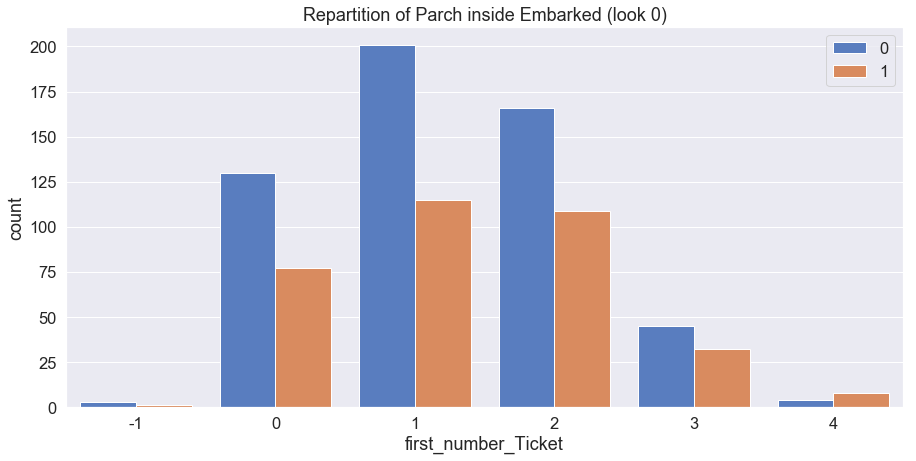

In [6]:
df = pd.DataFrame(data=train.values, columns=train.columns)
plt.figure(figsize=(15,7))
df['sum_char'] = [sum_char(re.findall(r"[\w']+", ticket)[-1]) if ticket != 'LINE' else -1 for ticket in train.Ticket]
plt.title('Repartition of Survived inside Sum char')
ax = sns.countplot(x="sum_char", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

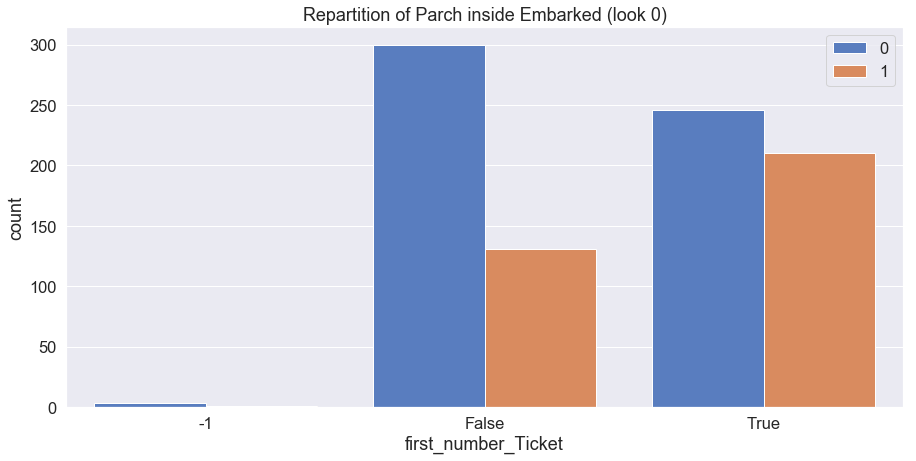

In [7]:
plt.figure(figsize=(15,7))
df['one_present'] = [one_present(re.findall(r"[\w']+", ticket)[-1]) if ticket != 'LINE' else -1 for ticket in train.Ticket]
plt.title('Repartition of Survived inside One present')
ax = sns.countplot(x="one_present", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

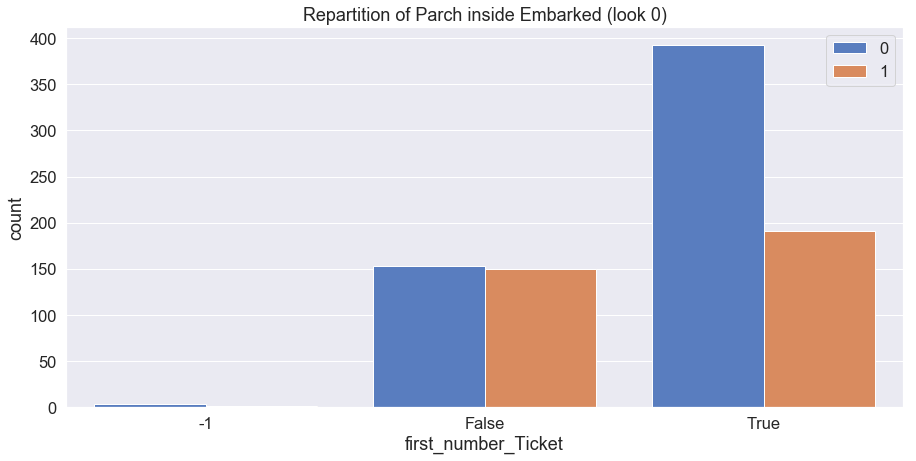

In [8]:
plt.figure(figsize=(15,7))
df['tree_present'] = [tree_present(re.findall(r"[\w']+", ticket)[-1]) if ticket != 'LINE' else -1 for ticket in train.Ticket]
plt.title('Repartition of Survived inside Tree present')
ax = sns.countplot(x="tree_present", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

In [9]:
def sum_char(string='1135'): 
    counts = {'3': 0, '4': 0}
    for char in string.lower():
        counts[char] = counts.get(char, 0) + 1
    return counts['3'] + counts['4']

one_present = lambda string: '1' in string 
tree_present = lambda string: '3' in string 

def treat_Ticket(df):
    
    sum_tree_four = [sum_char(re.findall(r"[\w']+", ticket)[-1]) if ticket != 'LINE' else -1 for ticket in df.Ticket]
    test_one = [one_present(re.findall(r"[\w']+", ticket)[-1]) if ticket != 'LINE' else -1 for ticket in df.Ticket]
    test_tree = [tree_present(re.findall(r"[\w']+", ticket)[-1]) if ticket != 'LINE' else -1 for ticket in df.Ticket]
    
    #################
    ### drop Name ###
    #################
    
    df = df.drop('Ticket', axis=1)

    
    #################
    ### DataFrame ###
    #################
    
    mp = pd.DataFrame(data=np.concatenate([np.array(sum_tree_four).reshape(len(df),1),
                                           np.array(test_one).reshape(len(df),1),
                                           np.array(test_tree).reshape(len(df),1)],
                                          axis=1),
                      columns=['sum_tree_four', 'test_one', 'test_tree'])
    
    
    
    ###############
    ### Dummies ###
    ###############
    
    df[pd.get_dummies(mp.sum_tree_four, prefix='sum_tree_four').columns] = \
    pd.get_dummies(mp.sum_tree_four, prefix='sum_tree_four')
    
    df[pd.get_dummies(mp.test_one, prefix='test_one').columns] = \
    pd.get_dummies(mp.test_one, prefix='test_one')

    df[pd.get_dummies(mp.test_tree, prefix='test_tree').columns] = \
    pd.get_dummies(mp.test_tree, prefix='test_tree')
    
    return df

# Parch

In [10]:
def treat_Parch(df):
    
    #####################
    ### dummies Parch ###
    #####################

    df[pd.get_dummies(df.Parch, prefix='Parch').columns] = pd.get_dummies(df.Parch, prefix='Parch')
    df = df.drop('Parch', axis=1)
    
    return df

# SibSp

In [11]:
def treat_SibSp(df):
    
    #####################
    ### dummies SibSp ###
    #####################

    df[pd.get_dummies(df.SibSp, prefix='SibSp').columns] = pd.get_dummies(df.SibSp, prefix='SibSp')
    df = df.drop('SibSp', axis=1)
    
    return df

# Pclass

In [12]:
def treat_Pclass(df):
    
    ########################
    ### dummies Embarked ###
    ########################

    df[pd.get_dummies(df.Pclass, prefix='Pclass').columns] = pd.get_dummies(df.Pclass, prefix='Pclass')
    df = df.drop('Pclass', axis=1)
    
    return df

# Sex

In [13]:
def treat_Sex(df):
    
    ###################
    ### dummies Sex ###
    ###################

    df[pd.get_dummies(df.Sex, prefix='Sex').columns] = pd.get_dummies(df.Sex, prefix='Sex')
    df = df.drop('Sex', axis=1)
    
    return df

# Fare
In the train set we do not have missing values but for the test set we got one.

In [14]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Here we will not look far to find a "good" solution, we will just look at similar person (no one in the test set):

In [15]:
train[(train.Pclass == 3) & (train.Sex == 'male') & (train.SibSp == 0) & (train.Parch == 0) & (train.Embarked == 'S')\
      & (train.Age >= 50)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
222,223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
406,407,0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S
631,632,0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,NaN,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


Hence we will take the average Fare to update the missing value:

In [16]:
test.at[152, 'Fare'] = train[(train.Pclass == 3) & (train.Sex == 'male') & (train.SibSp == 0) & (train.Parch == 0)\
                             & (train.Embarked == 'S') & (train.Age >= 50)].Fare.mean()

Now let's test some features:

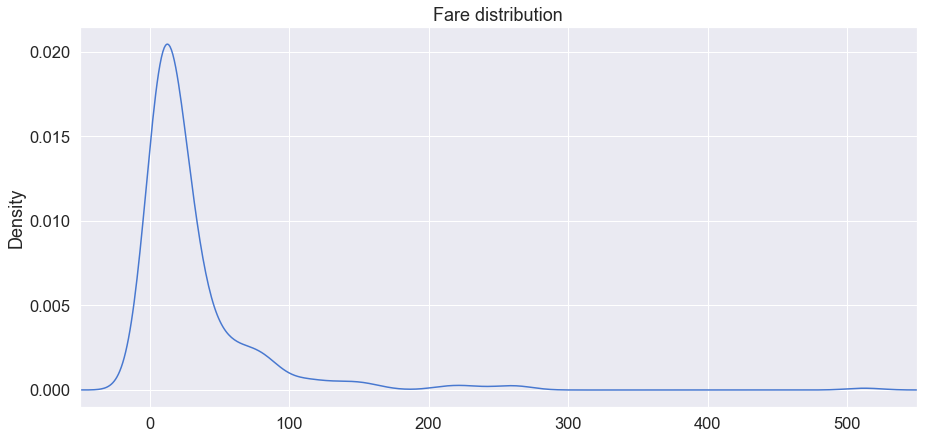

In [17]:
plt.figure(figsize=(15,7))
plt.title('Fare distribution')
train.Fare.plot(kind='kde')
plt.xlim(-50, 550)
plt.show()

In [18]:
def binary_Fare(n=42):
    summ = 0
    for char in "{0:b}".format(int(n)):
        summ += int(char)
    return summ

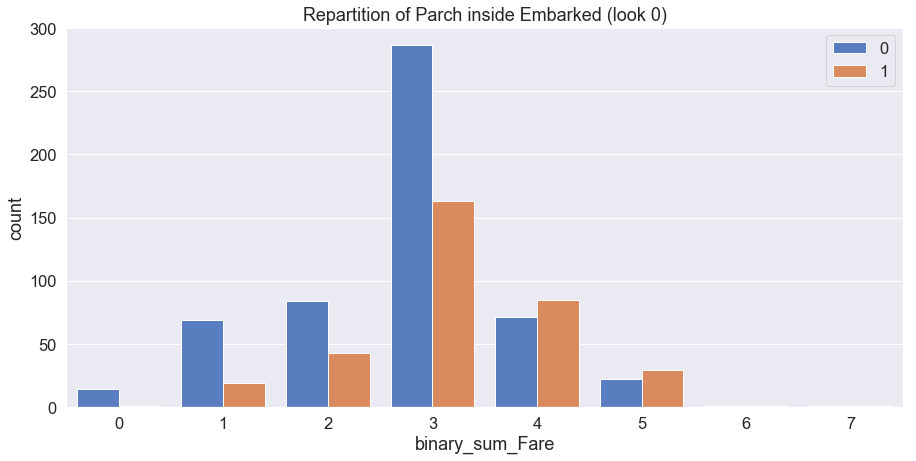

In [19]:
plt.figure(figsize=(15,7))
df['binary_sum_Fare'] = [binary_Fare(price) for price in train.Fare]
plt.title('Repartition of Survived inside Binary sum Fare')
ax = sns.countplot(x="binary_sum_Fare", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

In [20]:
inf_ten = lambda n: 1 * (n <=10)

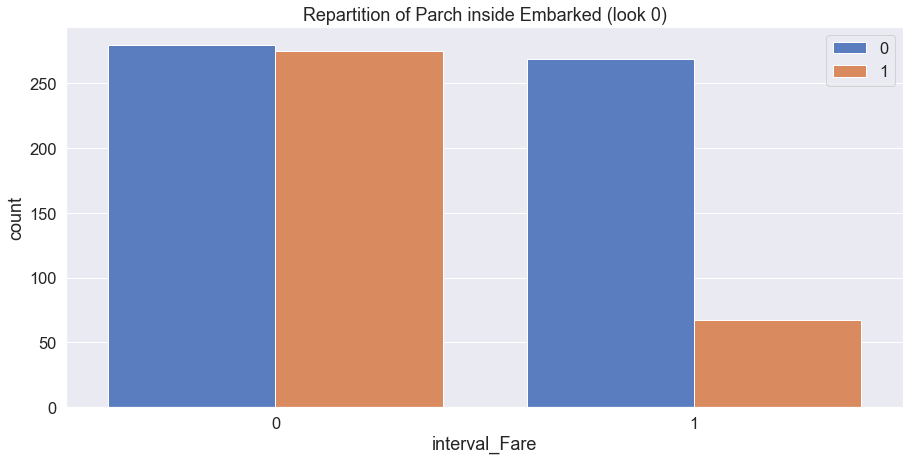

In [21]:
plt.figure(figsize=(15,7))
df['inf_ten'] = [inf_ten(price) for price in train.Fare]
plt.title('Repartition of Survived inside Inferior or equal to ten')
ax = sns.countplot(x="inf_ten", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

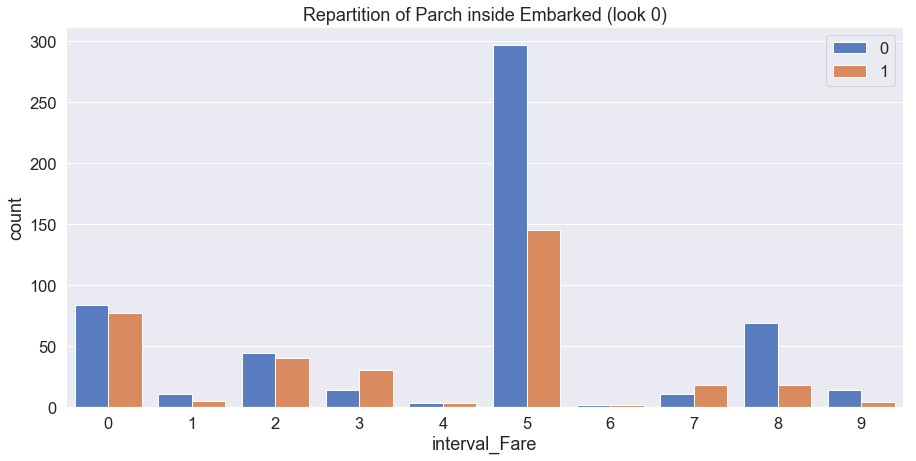

In [22]:
last_decimal_Fare = lambda n: int(str(n)[-1])

plt.figure(figsize=(15,7))
df['last_decimal_Fare'] = [last_decimal_Fare(price) for price in train.Fare]
plt.title('Repartition of Survived inside  Last decimal Fare')
ax = sns.countplot(x="last_decimal_Fare", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

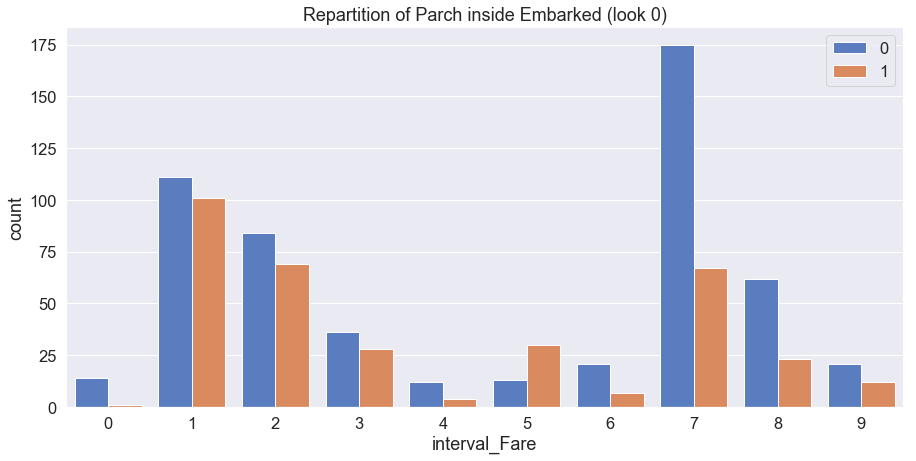

In [23]:
start_decimal_Fare = lambda n: int(str(n)[0])

plt.figure(figsize=(15,7))
df['start_decimal_Fare'] = [start_decimal_Fare(price) for price in train.Fare]
plt.title('Repartition of Survived inside  Start decimal Fare')
ax = sns.countplot(x="start_decimal_Fare", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

In [24]:
inf_ten_Fare = lambda n: 1 * (n <=10)
last_decimal_Fare = lambda n: int(str(n)[-1])
start_decimal_Fare = lambda n: int(str(n)[0])
sum_decimal_Fare = lambda n: sum(list(map(int, list(str(n).split('.')[-1]))))


def treat_Fare(df):
    
    inf_ten = [inf_ten_Fare(price) for price in df.Fare] # no need dummies
    last_Fare = [last_decimal_Fare(price) for price in df.Fare]
    start_Fare = [start_decimal_Fare(price) for price in df.Fare]
    sum_Fare = [sum_decimal_Fare(price) for price in df.Fare]
    
    #################
    ### drop Name ###
    #################
    
    df = df.drop('Fare', axis=1)

    
    #################
    ### DataFrame ###
    #################
    
    mp = pd.DataFrame(data=np.concatenate([np.array(inf_ten).reshape(len(df),1),
                                           np.array(last_Fare).reshape(len(df),1),
                                           np.array(start_Fare).reshape(len(df),1),
                                           np.array(sum_Fare).reshape(len(df),1)],
                                          axis=1),
                      columns=['inf_ten', 'last_Fare', 'start_Fare', 'sum_Fare'])
    
    
    
    ###############
    ### Dummies ###
    ###############
    
    df[pd.get_dummies(mp.last_Fare, prefix='last_Fare').columns] = \
    pd.get_dummies(mp.last_Fare, prefix='last_Fare')
    
    df[pd.get_dummies(mp.start_Fare, prefix='start_Fare').columns] = \
    pd.get_dummies(mp.start_Fare, prefix='start_Fare')
    
    df[pd.get_dummies(mp.sum_Fare, prefix='sum_Fare').columns] = \
    pd.get_dummies(mp.sum_Fare, prefix='sum_Fare')

    
    return df

# Embarked
The test set reveals that it has no NaN for Embarked and we only got 2 NaN for the training set:

In [25]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


As this 2 persons have the exact same ticket (Ticket, Fare, Cabin) we will suppose that they embarked together. 

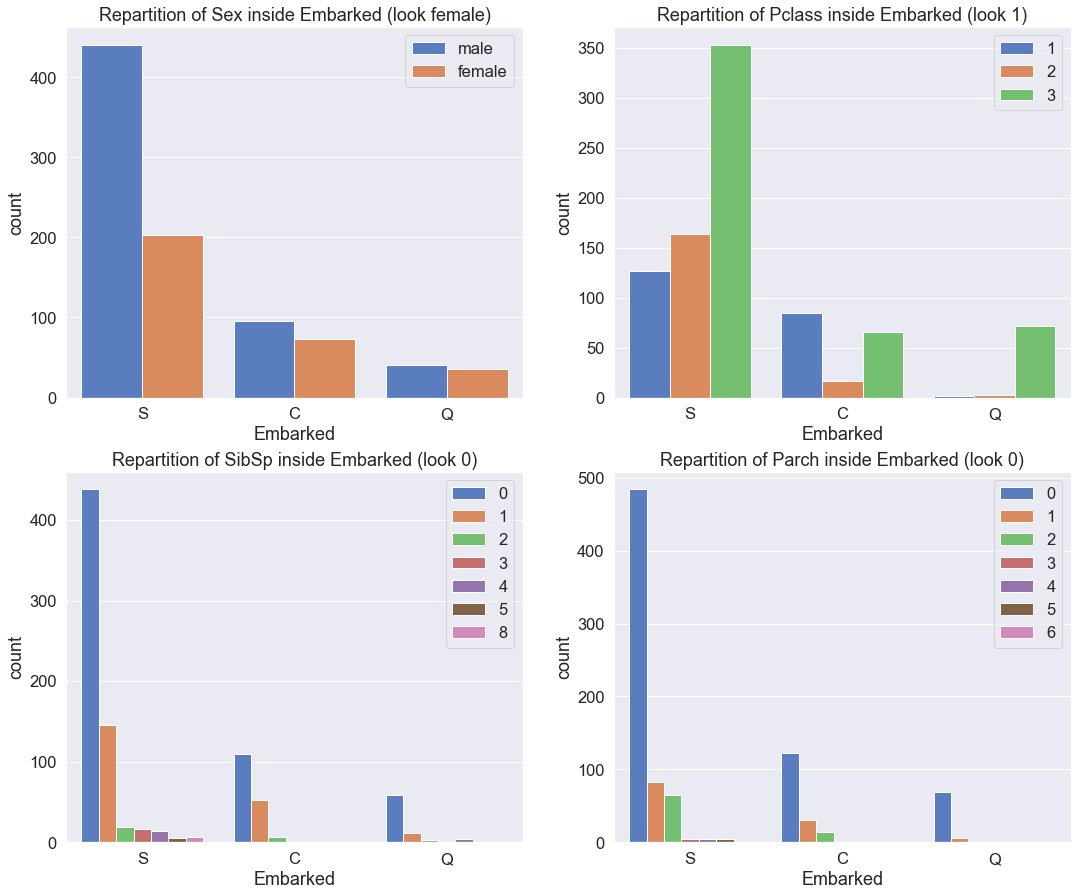

In [26]:
plt.figure(figsize=(18, 15))
plt.subplot(2, 2, 1)
plt.title('Repartition of Sex inside Embarked (look female)')
ax = sns.countplot(x="Embarked", hue='Sex', data=train)
ax.legend(loc='upper right')
plt.subplot(2, 2, 2)
plt.title('Repartition of Pclass inside Embarked (look 1)')
ax = sns.countplot(x="Embarked", hue='Pclass', data=train)
ax.legend(loc='upper right')
plt.subplot(2, 2, 3)
plt.title('Repartition of SibSp inside Embarked (look 0)')
ax = sns.countplot(x="Embarked", hue='SibSp', data=train)
ax.legend(loc='upper right')
plt.subplot(2, 2, 4)
plt.title('Repartition of Parch inside Embarked (look 0)')
ax = sns.countplot(x="Embarked", hue='Parch', data=train)
ax.legend(loc='upper right')
plt.show()

By only looking at this 4 figures we could say **S** is the most likely solution. But what if we redo the same analysis as for **Fare**? In this case we will not look at each "probability" separatly but, on the contrary, we will look at the intersection of them (that is what we want). We will take the advantage to also use the test set and combine it with the training set: 

In [27]:
data_temp = pd.concat([train[~np.isnan(train.Age)].drop(['PassengerId', 'Survived', 'Cabin'], axis=1),
                         test[~np.isnan(test.Age)].drop(['PassengerId', 'Cabin'], axis=1)],
                         ignore_index=True)
data_temp[(data_temp.Sex == 'female') & (data_temp.Pclass == 1) & (data_temp.SibSp == 0) \
          & (data_temp.Parch == 0)].Embarked.value_counts()

C    27
S    19
Name: Embarked, dtype: int64

Now that we have a correct result, we can determine the most likely solution which turns out to be **C**. Hence we update the missing values with **C**:

In [28]:
train.at[61, 'Embarked'] = 'C'
train.at[829, 'Embarked'] = 'C'

In [29]:
def treat_Embarked(df):
    
    ########################
    ### dummies Embarked ###
    ########################

    df[pd.get_dummies(df.Embarked, prefix='Embarked').columns] = pd.get_dummies(df.Embarked, prefix='Embarked')
    df = df.drop('Embarked', axis=1)
    
    return df

# Name
We have a lot of information in the **Name** column. Here we will first try to see what can be important to predict if someone has survived and them we will creat a function to clean the data set.

In [30]:
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

We will use this configuration


| Name_top        | Title           | Name_end  |
|: -------------: |:-------------:| -----:|
| Braund     | Mr | Owen Harris |

But first we will look at the length of the **Name**:

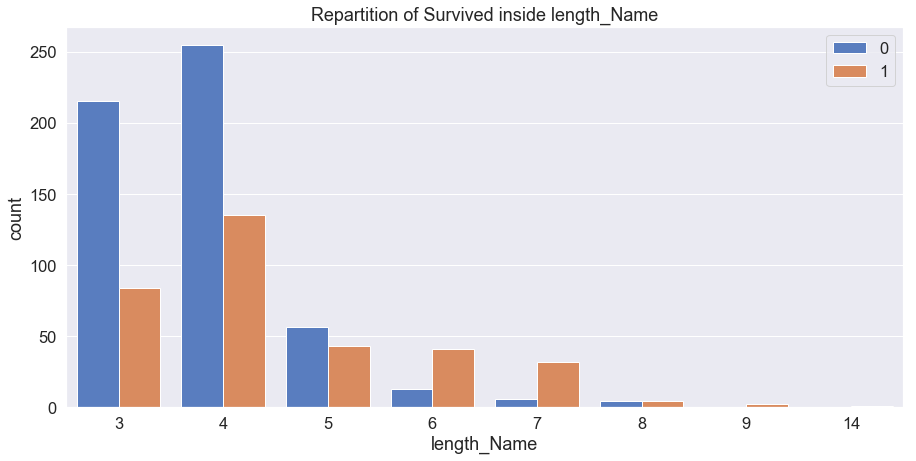

In [31]:
df = pd.DataFrame(data=[len(re.findall(r"[\w']+", name)) for name in train.Name], columns=['length_Name'])
df['Survived'] = train.Survived
plt.figure(figsize=(15,7))
plt.title('Repartition of Survived inside length_Name')
ax = sns.countplot(x="length_Name", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

The figure reveals that 3 and 4 have poor chance to survive as opposed to 6 and 7, therefore we will use this feature. Now let's take a look at **Name_top**:

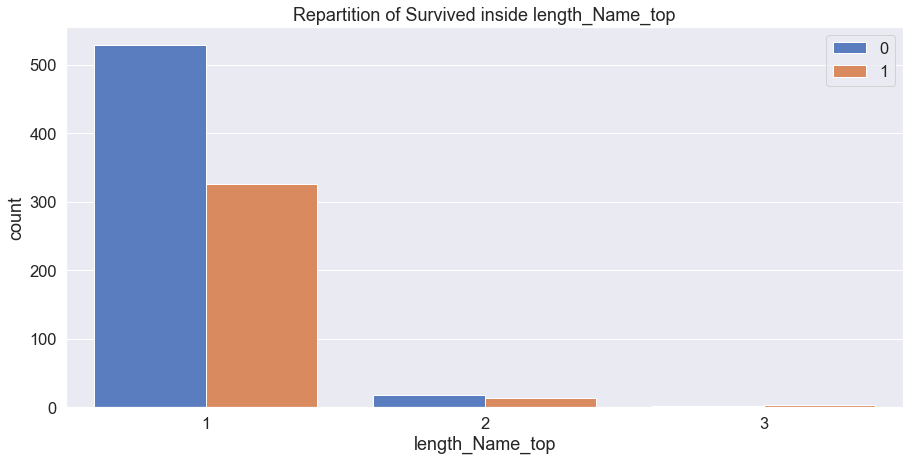

In [32]:
Name_top = [name.split('.')[0].split(',')[0] for name in train.Name]
df['length_Name_top'] = [len(re.findall(r"[\w']+", name)) for name in Name_top]
plt.figure(figsize=(15,7))
plt.title('Repartition of Survived inside length_Name_top')
ax = sns.countplot(x="length_Name_top", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

Here the figure illustrates that we can not use this feature to help us predict the **Survived** column. Now we will look at the max occured character in **Name_top**:

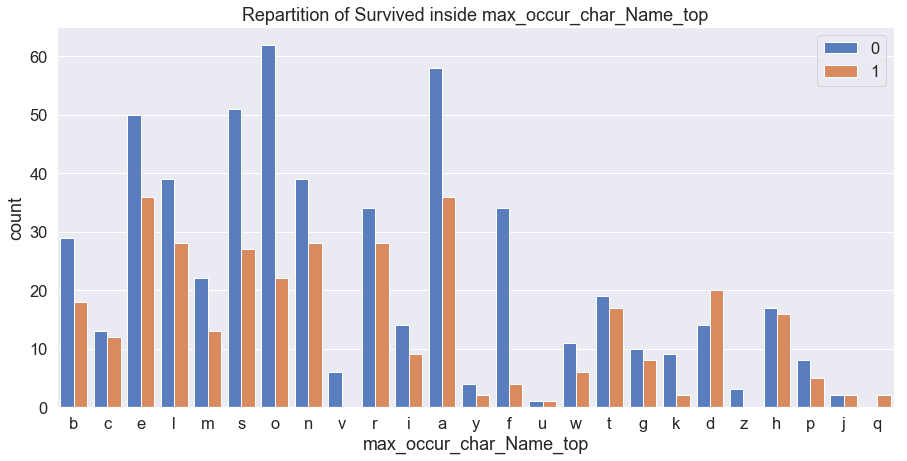

In [33]:
def max_occur_char(string='aaaaatefbcs'):
    counts = {}
    for char in string.lower():
        if char.isalpha():
            counts[char] = counts.get(char, 0) + 1
    return max(counts, key=counts.get)

df['max_occur_char_Name_top'] = [max_occur_char(name) for name in Name_top]
plt.figure(figsize=(15,7))
plt.title('Repartition of Survived inside max_occur_char_Name_top')
ax = sns.countplot(x="max_occur_char_Name_top", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

This feature seems to be important and we will keep it for now. We may prune in the futur by setting a threshold like below:

In [34]:
threshold = 0.65
dead_percentage = df[df.Survived==0].max_occur_char_Name_top.value_counts() / (\
                  df[df.Survived==0].max_occur_char_Name_top.value_counts() +\
                  df[df.Survived==1].max_occur_char_Name_top.value_counts())
dead_percentage[dead_percentage > threshold]

f    0.894737
k    0.818182
o    0.738095
s    0.653846
y    0.666667
Name: max_occur_char_Name_top, dtype: float64

Now still in **Name_top** we take a look at the start and end letter:

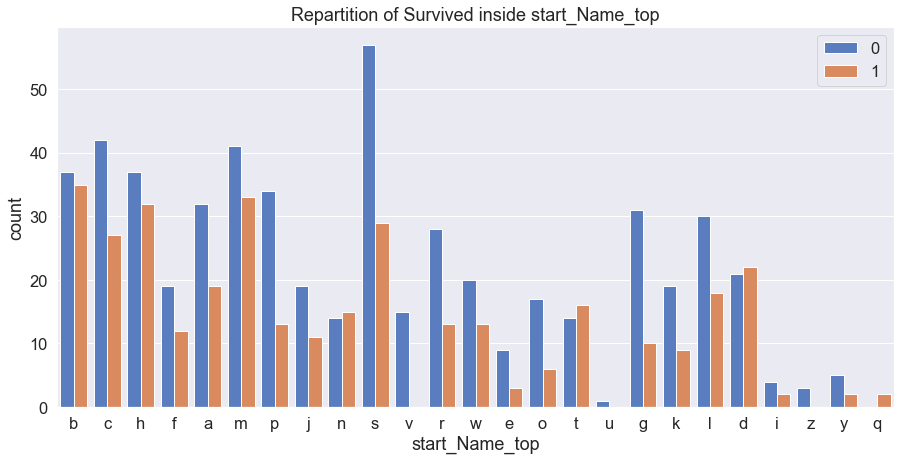

In [35]:
df['start_Name_top'] = [name[0].lower() for name in Name_top]
plt.figure(figsize=(15,7))
plt.title('Repartition of Survived inside start_Name_top')
ax = sns.countplot(x="start_Name_top", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

In [36]:
threshold = 0.65
dead_percentage = df[df.Survived==0].start_Name_top.value_counts() / (\
                  df[df.Survived==0].start_Name_top.value_counts() +\
                  df[df.Survived==1].start_Name_top.value_counts())
dead_percentage[dead_percentage > threshold]

e    0.750000
g    0.756098
i    0.666667
k    0.678571
o    0.739130
p    0.723404
r    0.682927
s    0.662791
y    0.714286
Name: start_Name_top, dtype: float64

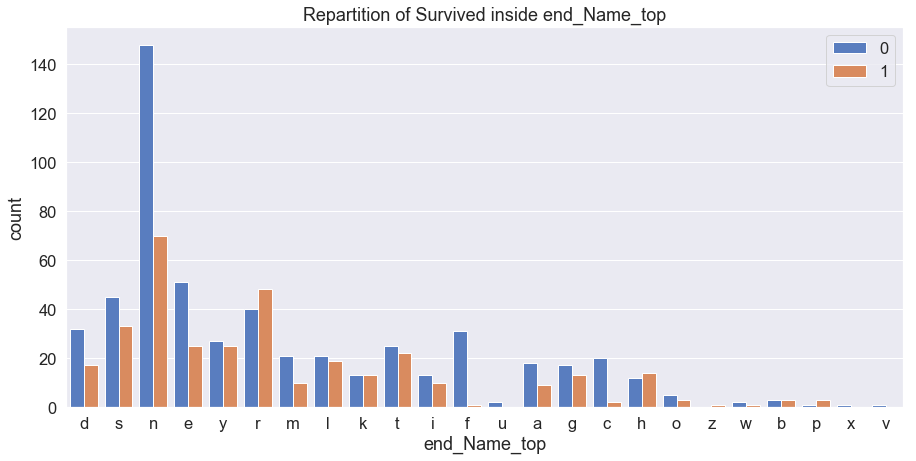

In [37]:
df['end_Name_top'] = [name[-1].lower() for name in Name_top]
plt.figure(figsize=(15,7))
plt.title('Repartition of Survived inside end_Name_top')
ax = sns.countplot(x="end_Name_top", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

In [38]:
threshold = 0.65
dead_percentage = df[df.Survived==0].end_Name_top.value_counts() / (\
                  df[df.Survived==0].end_Name_top.value_counts() +\
                  df[df.Survived==1].end_Name_top.value_counts())
dead_percentage[dead_percentage > threshold]

a    0.666667
c    0.909091
d    0.653061
e    0.671053
f    0.968750
m    0.677419
n    0.678899
w    0.666667
Name: end_Name_top, dtype: float64

Same as before it would be interesting to keep those featues but maybe after adding a threshold. Now we look at vowels:

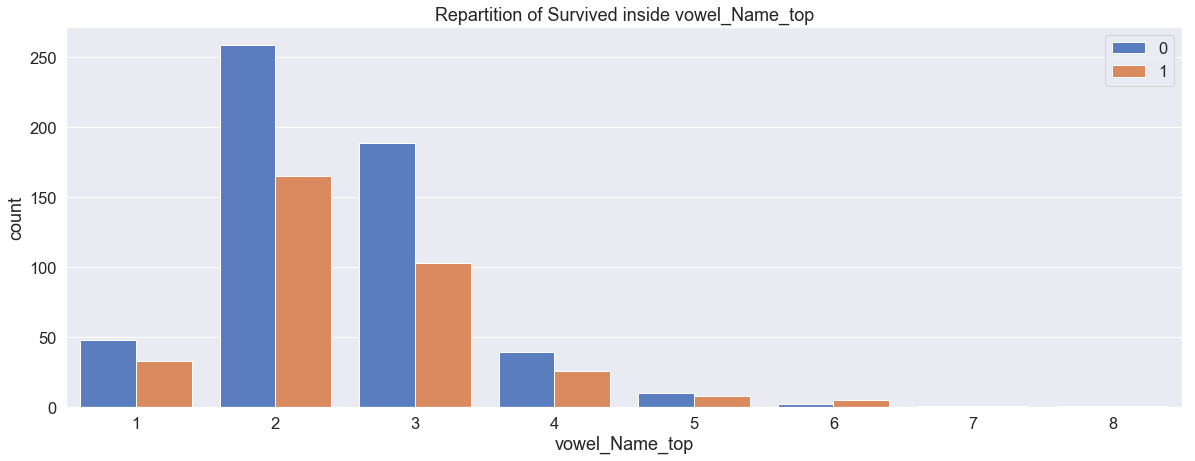

In [39]:
def vowel_name(string='Jean-Pierre'):
    nb_vowel = 0
    list_vowel = ['a', 'e', 'i', 'o', 'u', 'y'] 
    for char in string.lower():
        if char.isalpha() and char in list_vowel:
            nb_vowel += 1
    return nb_vowel

df['vowel_Name_top'] = [vowel_name(name) for name in Name_top]
plt.figure(figsize=(20,7))
plt.title('Repartition of Survived inside vowel_Name_top')
ax = sns.countplot(x="vowel_Name_top", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

In [40]:
threshold = 0.65
dead_percentage = df[df.Survived==0].vowel_Name_top.value_counts() / (\
                  df[df.Survived==0].vowel_Name_top.value_counts() +\
                  df[df.Survived==1].vowel_Name_top.value_counts())
dead_percentage[dead_percentage > threshold]

Series([], Name: vowel_Name_top, dtype: float64)

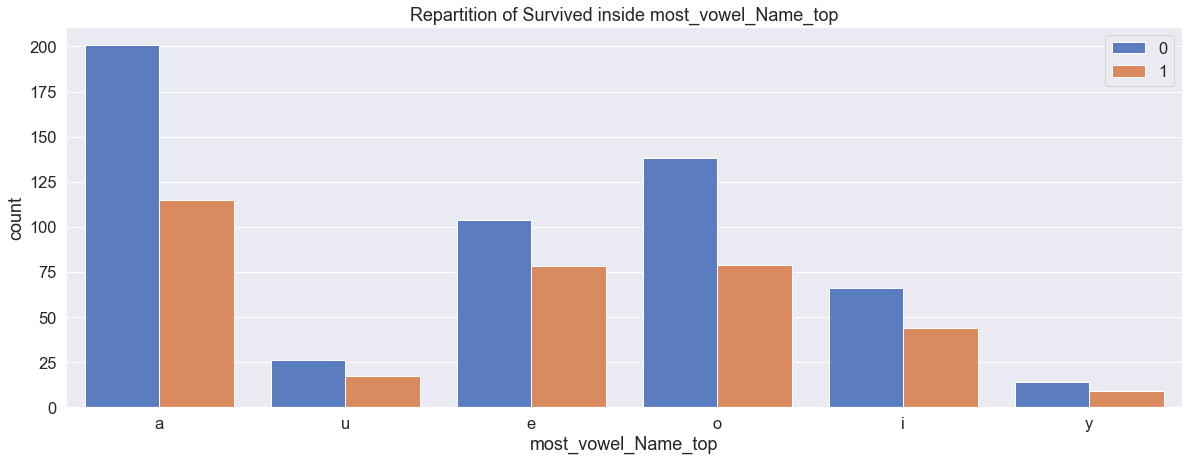

In [41]:
def max_occur_vowel_char(string='aaaaatefbcs'):
    counts = {}
    list_vowel = ['a', 'e', 'i', 'o', 'u', 'y'] 
    for char in string.lower():
        if char.isalpha() and char in list_vowel:
            counts[char] = counts.get(char, 0) + 1
    return max(counts, key=counts.get)

df['most_vowel_Name_top'] = [max_occur_vowel_char(name) for name in Name_top]
plt.figure(figsize=(20,7))
plt.title('Repartition of Survived inside most_vowel_Name_top')
ax = sns.countplot(x="most_vowel_Name_top", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

In [42]:
threshold = 0.65
dead_percentage = df[df.Survived==0].most_vowel_Name_top.value_counts() / (\
                  df[df.Survived==0].most_vowel_Name_top.value_counts() +\
                  df[df.Survived==1].most_vowel_Name_top.value_counts())
dead_percentage[dead_percentage > threshold]

Series([], Name: most_vowel_Name_top, dtype: float64)

For the vowels it seems that we do not have a significant impact of them. We switch to **Title**:

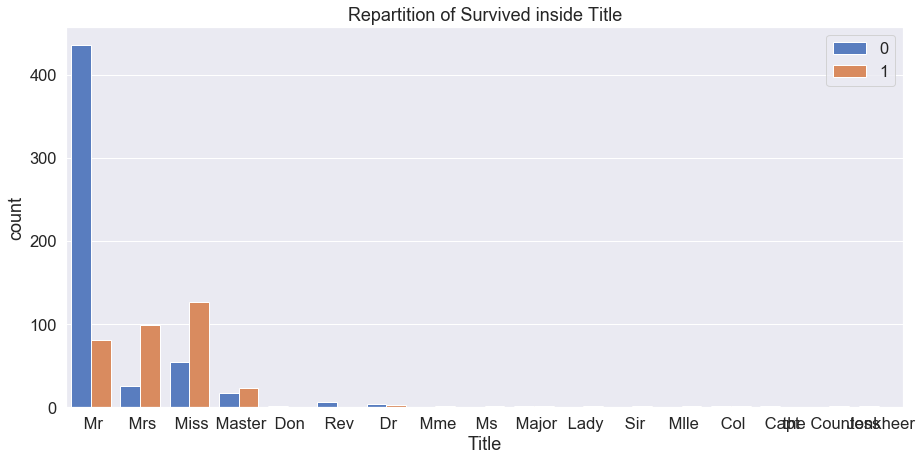

In [43]:
df['Title'] = [name.split('.')[0].split(',')[-1] for name in train.Name]
plt.figure(figsize=(15,7))
plt.title('Repartition of Survived inside Title')
ax = sns.countplot(x="Title", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

Ok so Mr is really important, we will just perform an aggregation of other to fit with: **Mr**, **Mrs**, **Miss**, **Master**. Corresponding feature are:

 * **Mr**: **Dr**, **Rev**, **Col**, **Major**, **Capt**, **Johnkheer**, **Sir**
 * **Mrs**: **Mme**, **the Countess**
 * **Miss**: **Mlle**, **Ms**, **Lady**
 * **Master**
 
Finally we have to look at Name_end:

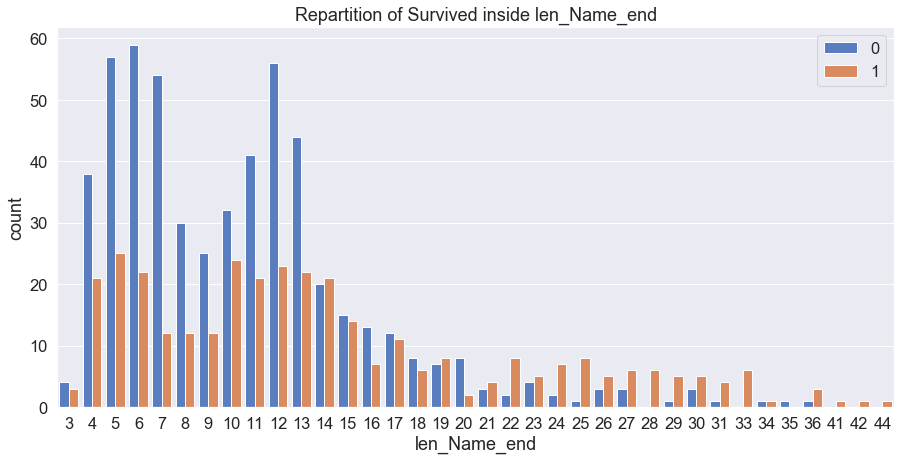

In [44]:
df['len_Name_end'] = [len(''.join(re.findall(r"[\w']+", name.split('.')[1:][0]))) for name in train.Name]
plt.figure(figsize=(15,7))
plt.title('Repartition of Survived inside len_Name_end')
ax = sns.countplot(x="len_Name_end", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

In [45]:
threshold = 0.65
dead_percentage = df[df.Survived==0].len_Name_end.value_counts() / (\
                  df[df.Survived==0].len_Name_end.value_counts() +\
                  df[df.Survived==1].len_Name_end.value_counts())
dead_percentage[dead_percentage > threshold]

5     0.695122
6     0.728395
7     0.818182
8     0.714286
9     0.675676
11    0.661290
12    0.708861
13    0.666667
20    0.800000
Name: len_Name_end, dtype: float64

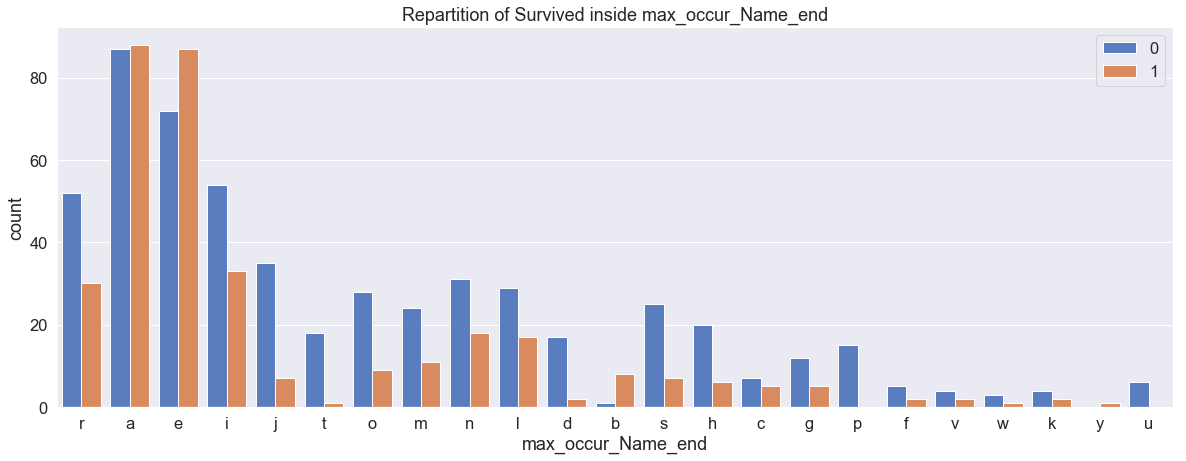

In [46]:
df['max_occur_Name_end'] = [max_occur_char(''.join(re.findall(r"[\w']+", name.split('.')[1:][0]))) \
                             for name in train.Name]
plt.figure(figsize=(20,7))
plt.title('Repartition of Survived inside max_occur_Name_end')
ax = sns.countplot(x="max_occur_Name_end", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

In [47]:
threshold = 0.65
dead_percentage = df[df.Survived==0].max_occur_Name_end.value_counts() / (\
                  df[df.Survived==0].max_occur_Name_end.value_counts() +\
                  df[df.Survived==1].max_occur_Name_end.value_counts())
dead_percentage[dead_percentage > threshold]

d    0.894737
f    0.714286
g    0.705882
h    0.769231
j    0.833333
k    0.666667
m    0.685714
o    0.756757
s    0.781250
t    0.947368
v    0.666667
w    0.750000
Name: max_occur_Name_end, dtype: float64

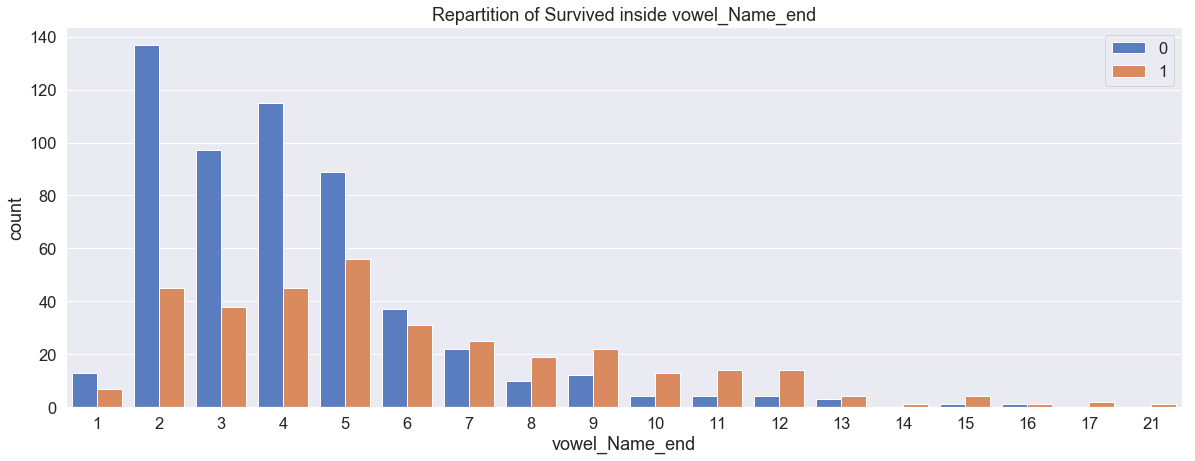

In [48]:
df['vowel_Name_end'] = [vowel_name(''.join(re.findall(r"[\w']+", name.split('.')[1:][0]))) \
                             for name in train.Name]
plt.figure(figsize=(20,7))
plt.title('Repartition of Survived inside vowel_Name_end')
ax = sns.countplot(x="vowel_Name_end", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

In [49]:
threshold = 0.65
dead_percentage = df[df.Survived==0].vowel_Name_end.value_counts() / (\
                  df[df.Survived==0].vowel_Name_end.value_counts() +\
                  df[df.Survived==1].vowel_Name_end.value_counts())
dead_percentage[dead_percentage > threshold]

2    0.752747
3    0.718519
4    0.718750
Name: vowel_Name_end, dtype: float64

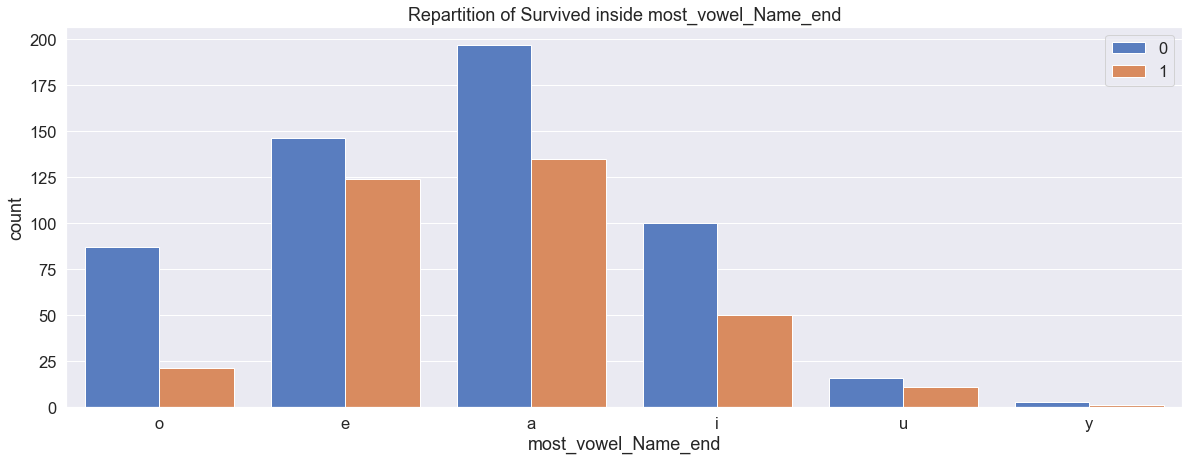

In [50]:
df['most_vowel_Name_end'] = [max_occur_vowel_char(''.join(re.findall(r"[\w']+", name.split('.')[1:][0]))) \
                             for name in train.Name]
plt.figure(figsize=(20,7))
plt.title('Repartition of Survived inside most_vowel_Name_end')
ax = sns.countplot(x="most_vowel_Name_end", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

In [51]:
threshold = 0.65
dead_percentage = df[df.Survived==0].most_vowel_Name_end.value_counts() / (\
                  df[df.Survived==0].most_vowel_Name_end.value_counts() +\
                  df[df.Survived==1].most_vowel_Name_end.value_counts())
dead_percentage[dead_percentage > threshold]

i    0.666667
o    0.805556
y    0.750000
Name: most_vowel_Name_end, dtype: float64

In [52]:
def treat_Name(df):
    
    ###############
    ### general ###
    ###############
    
    length_Name = [len(re.findall(r"[\w']+", name)) for name in df.Name] # integer
    
    ################
    ### Name top ###
    ################
    
    Name_top = [name.split('.')[0].split(',')[0] for name in df.Name]
    max_occur_char_Name_top = [max_occur_char(name) for name in Name_top]
    start_char_Name_top = [name[0].lower() for name in Name_top]
    end_char_Name_top = [name[-1].lower() for name in Name_top]
    
    ######################
    ### Title cleaning ###
    ######################
    
    Title = [name.split('.')[0].split(',')[-1][1:] for name in df.Name]
    df['Title'] = Title
    df = df.replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Johnkheer', 'Sir'], 'Mr')
    df = df.replace(['Mme', 'the Countess', 'Dona'], 'Mrs')
    df = df.replace(['Mlle', 'Ms', 'Lady'], 'Miss')
    
    ################
    ### Name end ###
    ################
    
    length_Name_end = [len(''.join(re.findall(r"[\w']+", name.split('.')[1:][0]))) for name in df.Name]
    max_occur_char_Name_end = [max_occur_char(''.join(re.findall(r"[\w']+", name.split('.')[1:][0]))) \
                             for name in df.Name]
    vowel_Name_end = [vowel_name(''.join(re.findall(r"[\w']+", name.split('.')[1:][0]))) for name in df.Name]
    most_vowel_Name_end = [max_occur_vowel_char(''.join(re.findall(r"[\w']+", name.split('.')[1:][0]))) \
                             for name in df.Name]
    
    ###################
    ### same Family ###
    ###################
    
    df['Family'] = [name.split(',')[0] for name in df.Name]
    df['Family'] = df['Family'].duplicated() * 1
    
    #################
    ### drop Name ###
    #################
    
    df = df.drop('Name', axis=1)

    
    #################
    ### DataFrame ###
    #################
    
    mp = pd.DataFrame(data=np.concatenate([np.array(length_Name).reshape(len(df),1),
                                           np.array(max_occur_char_Name_top).reshape(len(df),1),
                                           np.array(start_char_Name_top).reshape(len(df),1),
                                           np.array(end_char_Name_top).reshape(len(df),1),
                                           np.array(length_Name_end).reshape(len(df),1),
                                           np.array(max_occur_char_Name_end).reshape(len(df),1),
                                           np.array(vowel_Name_end).reshape(len(df),1),
                                           np.array(most_vowel_Name_end).reshape(len(df),1)],
                                          axis=1),
                      columns=['length_Name', 'max_occur_char_Name_top', 'start_char_Name_top',
                               'end_char_Name_top', 'length_Name_end', 'max_occur_char_Name_end', 'vowel_Name_end',
                               'most_vowel_Name_end'])
    
    
    
    ###############
    ### Dummies ###
    ###############
    
    df[pd.get_dummies(mp.max_occur_char_Name_top, prefix='max_occur_char_Name_top').columns] = \
    pd.get_dummies(mp.max_occur_char_Name_top, prefix='max_occur_char_Name_top')
    
    df[pd.get_dummies(mp.max_occur_char_Name_top, prefix='start_char_Name_top').columns] = \
    pd.get_dummies(mp.max_occur_char_Name_top, prefix='start_char_Name_top')
    
    df[pd.get_dummies(mp.max_occur_char_Name_top, prefix='end_char_Name_top').columns] = \
    pd.get_dummies(mp.max_occur_char_Name_top, prefix='end_char_Name_top')
    
    df[pd.get_dummies(df.Title, prefix='Title').columns] = pd.get_dummies(df.Title, prefix='Title')
    
    df = df.drop('Title', axis=1)
        
    df[pd.get_dummies(mp.max_occur_char_Name_top, prefix='max_occur_char_Name_end').columns] = \
    pd.get_dummies(mp.max_occur_char_Name_top, prefix='max_occur_char_Name_end')
            
    df[pd.get_dummies(mp.max_occur_char_Name_top, prefix='most_vowel_Name_end').columns] = \
    pd.get_dummies(mp.max_occur_char_Name_top, prefix='most_vowel_Name_end')
    
    
    return df

# Cabin
We just remove numbers:

In [53]:
def treat_Cabin(df):
    
    #####################
    ### dummies Cabin ###
    #####################
    
    df.Cabin = ['U' if pd.isnull(cabin) else cabin[0] for cabin in df.Cabin] # U for Unknow
    df.Cabin = df.Cabin.replace('T', 'A')
    df[pd.get_dummies(df.Cabin, prefix='Cabin').columns] = pd.get_dummies(df.Cabin, prefix='Cabin')
    
    #################
    ### drop Name ###
    #################
    
    df = df.drop('Cabin', axis=1)
    
    return df

# Age
We have 177 NaN out of 891 values, here we will see how to fix this. But first we creat a new feature:

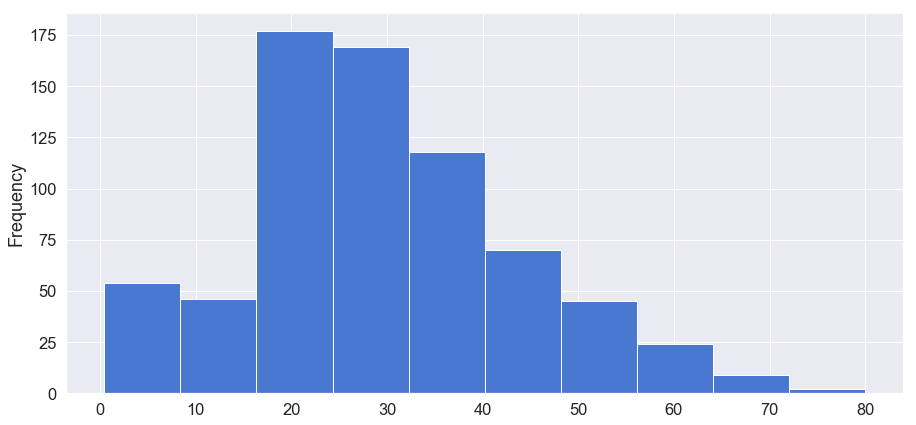

In [54]:
plt.figure(figsize=(15,7))
train.Age.plot(kind='hist')
plt.show()

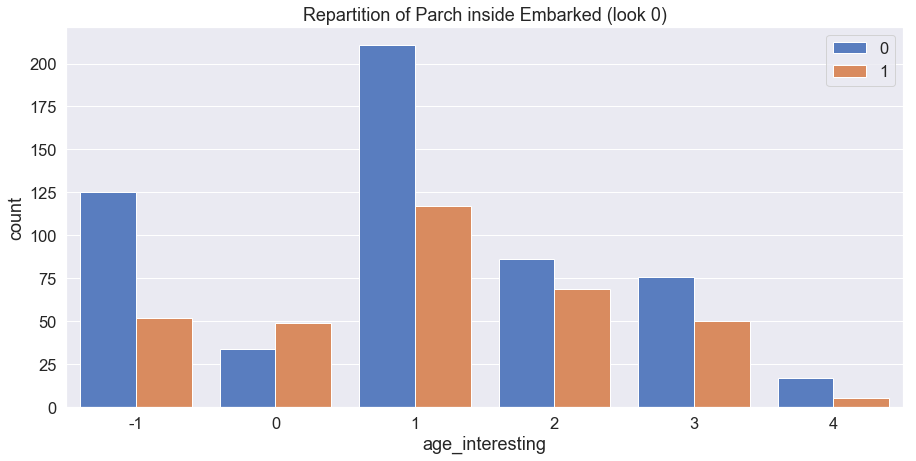

In [55]:
interval_Age = lambda n: list(map(lambda n, m: n <= m, [int(n)] * 5, [15, 30, 40,  60, np.inf])).index(True) * 1

plt.figure(figsize=(15,7))
df['age_interesting'] = [interval_Age(age) if not(np.isnan(age)) else -1 for age in train.Age]
plt.title('Repartition of Parch inside age_interesting')
ax = sns.countplot(x="age_interesting", hue='Survived', data=df)
ax.legend(loc='upper right')
plt.show()

In [56]:
test_sup = lambda n, m: n <= m
interval_Age = lambda n: list(map(test_sup, [int(n)] * 6, [5, 15, 30, 40,  60, 100])).index(True) * 1

def treat_Age(df):

    interval_arbi_Age = [interval_Age(age) if not(np.isnan(age)) else -1 for age in df.Age]
    
    #################
    ### DataFrame ###
    #################
    
    df['Age'] = interval_arbi_Age

    return df

To fill these missing values we will use machine learning methods. Indeed we already have 714 rows with the age and if we add the test dataset it reaches 1046! To build our model we will use this 2 dataset, split it into 2 set train/test to fit and validate our model. Then we will run a fit on the entire dataset and predict the missing age values for both train and test set.

In [57]:
###################
### new dataset ###
###################

data_for_age = pd.concat([train[~train.Age.isnull()].drop(['PassengerId', 'Survived'], axis=1),
                         test[~test.Age.isnull()].drop(['PassengerId'], axis=1)],
                         ignore_index=True)
data_for_age = treat_Age(treat_Cabin(treat_Pclass(treat_Name(treat_Sex(treat_SibSp(treat_Parch(treat_Ticket(treat_Fare(treat_Embarked(data_for_age))))))))))

##########################
### Data visualization ###
##########################

print("---------------------------")
print("*** Verification of NaN ***")
print(data_for_age.isnull().sum().sum())
print("---------------------------")

---------------------------
*** Verification of NaN ***
0
---------------------------


In [61]:
train = pd.read_csv("./train.csv") 
test = pd.read_csv("./test.csv")
train.head() 
df = treat_Parch(treat_SibSp(treat_Pclass(treat_Sex(treat_Name(treat_Embarked(treat_Cabin(
    train.drop(['Age', 'Ticket', 'Fare'], axis=1))))))))
test = treat_Parch(treat_SibSp(treat_Pclass(treat_Sex(treat_Name(treat_Embarked(treat_Cabin(
    test.drop(['Age', 'Ticket', 'Fare'], axis=1))))))))
test = test.drop('Parch_9', axis=1)
feature = list(test.columns)
test = test[feature]
feature.append('Survived')
df = df[feature]
df.head()

,PassengerId,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_C,...,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Survived
0,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,4,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


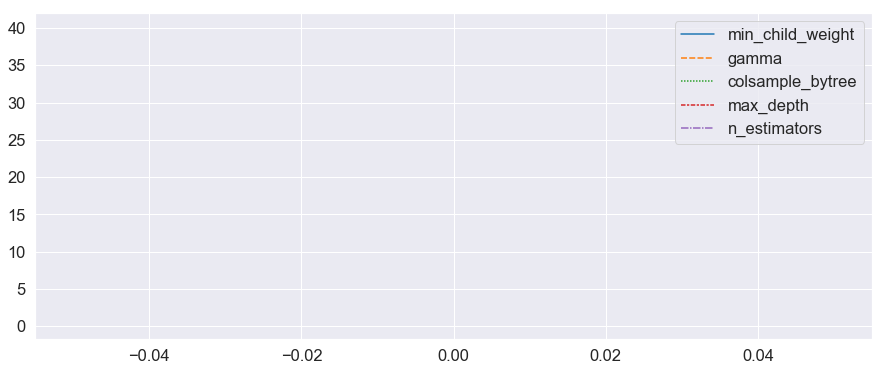

In [63]:
########################
### import libraries ###    **************** take 16 to 45 minutes to compute... **********************
########################

from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings("ignore")

#########################
### start grid search ###
#########################

n = 1
dic_result = {'min_child_weight': [], 'gamma': [],'colsample_bytree': [], 'max_depth': [],
              'n_estimators': []}

params = {
        'min_child_weight': [0, 1, 5, 10],
        'gamma': [0, 0.25, 0.5, 0.75, 1],
        'colsample_bytree': [0.4, 0.6, 0.8, 1.0],
        'max_depth': [10, 15, 20, 25],
        'n_estimators': [40, 60, 80]
        }

for i in tqdm(range(n)):
    bst = xgb.XGBClassifier(eta=0.03, objective='binary:logistic', silent=True)
    result_grid_search = GridSearchCV(estimator=bst, param_grid=params, cv=3)
    result_grid_search.fit(df.drop('Survived', axis=1), df.Survived)
    dic_result['min_child_weight'].append(result_grid_search.best_params_['min_child_weight'])
    dic_result['gamma'].append(result_grid_search.best_params_['gamma'])
    dic_result['colsample_bytree'].append(result_grid_search.best_params_['colsample_bytree'])
    dic_result['max_depth'].append(result_grid_search.best_params_['max_depth'])
    dic_result['n_estimators'].append(result_grid_search.best_params_['n_estimators'])
    
####################
### to DataFrame ###
####################

result_xgb = pd.DataFrame.from_dict(dic_result)
plt.figure(figsize=(15,6))
sns.lineplot(data=result_xgb, palette="tab10", linewidth=2.5)
plt.show()

In [70]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score 


x_train, x_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df.Survived,
                                                    test_size=0.3, random_state=141421)

param = {'min_child_weight': [10],
 'gamma': [0.25],
 'colsample_bytree': [0.4],
 'max_depth': [10],
 'n_estimators': [40]} 

bst = xgb.XGBClassifier(eta=0.03, objective='binary:logistic', silent=True, random_state=141421,
                        colsample_bytree=result_grid_search.best_params_['colsample_bytree'],
                        gamma=result_grid_search.best_params_['gamma'], 
                        max_depth=result_grid_search.best_params_['max_depth'],
                        min_child_weight=result_grid_search.best_params_['min_child_weight'],
                        n_estimators=result_grid_search.best_params_['n_estimators'])

bst = bst.fit(x_train, y_train)
y_pred = bst.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.8134328358208955


In [69]:
bst.fit(df.drop('Survived', axis=1), df.Survived)
y_pred = bst.predict(test)
Kaggle = pd.DataFrame(data=test.PassengerId.values, columns=['PassengerId'])
Kaggle['Survived'] = y_pred
Kaggle.to_csv('predicted.csv', index=False)

In [60]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import GridSearchCV
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import warnings
warnings.filterwarnings("ignore")

def tune_plot(model, param, X, y, normalize=1, iter_gridsearch=1, nb_cv=5, test_size=0.3, seed=141421):
    
    """
    Tune a given model with GridSearchCV and give for accuracy results with a confusion matrix.
    
    First you need to make sure that you imported the library for your model!
    
    model = classificator
    param = parameters of your classificator that you want to tune 
    X = data for prediction (DataFrame pref)
    y = target to predict (DataFrame pref)
    normalize = True/False (normalize both X and y with StandardScaler and LabelEncoder)
    iter_gridsearch = number of iteration for GridSearchCV (can be usefull if your model involve randomness)
    nb_cv = number of cross validation
    test_size = test size in percent (splitting train and test set)
    seed = seed for random state
    """
    
    print(" ************************* ", str(model), " ************************* ")
    
    ######################
    ### Normalize data ###
    ######################
    
    if normalize:
        le = LabelEncoder()
        le.fit(y)
        yy = le.transform(y)

        scaler = StandardScaler()
        scaler.fit(X)
        XX = scaler.transform(X)
    else:
        yy = y
        XX = X
    
    ####################
    ### GridSearchCV ###
    ####################
    
    if iter_gridsearch > 1:
        keys = param.keys()
        dic_result = {key: [] for key in keys}
        for i in tqdm(range(iter_gridsearch)):
            clf = model()
            result_grid_search = GridSearchCV(estimator=clf, param_grid=param, cv=nb_cv, return_train_score=False)
            result_grid_search.fit(XX, yy)
            for key in keys:
                dic_result[key].append(result_grid_search.best_params_[key])
        best_param = {}
        for key in keys:
            track = {}
            for item in dic_result[key]: 
                if item not in track:
                    track[item] = 0
                else:
                    track[item] += 1
            best_param[key] = max(track, key=track.get)
    else:
        clf = model()
        result_grid_search = GridSearchCV(estimator=clf, param_grid=param, cv=nb_cv)
        result_grid_search.fit(XX, yy)
        best_param = result_grid_search.best_params_
    
    print('best parameters: ', best_param)
    
    ####################
    ### update model ###
    ####################
    
    clf = model(**best_param)
    
    ########################
    ### train / test set ###
    ########################
    
    x_train, x_test, y_train, y_test = train_test_split(XX, yy, test_size=test_size, random_state=seed)
    
    #################
    ### fit model ###
    #################    
    
    clf.fit(x_train, y_train)
    
    ########################
    ### Cross validation ###
    ########################

    print('Average cross validation: ' + str(np.mean(cross_val_score(clf, XX, yy, cv=nb_cv))))
    print('Accuracy is: ', accuracy_score(y_test, clf.predict(x_test)))
    
    #####################################
    ### plotting the confusion matrix ###
    #####################################

    title='Confusion matrix'
    plt.figure(figsize=(25,10))
    cm = confusion_matrix(y_test, clf.predict(x_test))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    classes = y.unique() # care here always y not yy!
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    return best_param

# KNeighborsClassifier 

 *************************  <class 'sklearn.neighbors.classification.KNeighborsClassifier'>  ************************* 


best parameters:  {'n_neighbors': 6, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 3, 'metric': 'manhattan'}
Average cross validation: 0.7633524092422583
Accuracy is:  0.75


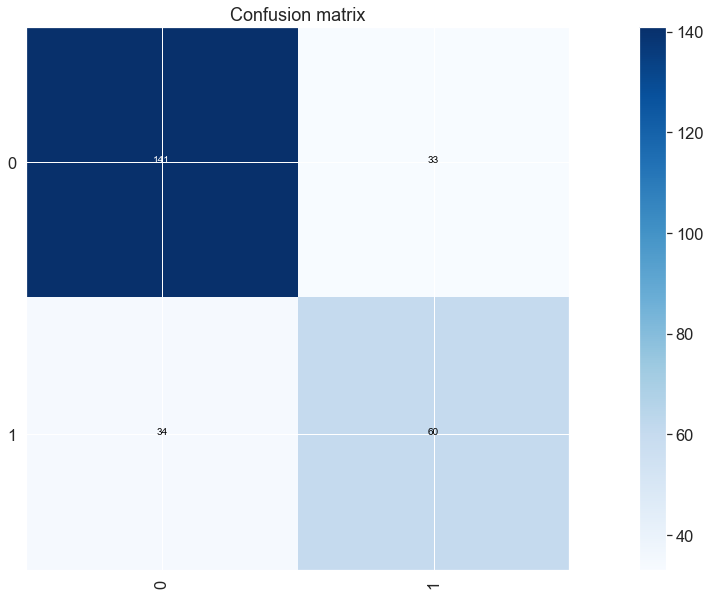

In [74]:
param = {
        'n_neighbors': [4, 6, 8],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto'],
        'leaf_size': [2, 4, 6],
        'metric': ['manhattan', 'euclidean']
        }

best_param_KN = tune_plot(KNeighborsClassifier, param,
                          df.drop(['Survived'], axis=1), df.Survived, normalize=True,
                          iter_gridsearch=10, nb_cv=5, test_size=0.3, seed=141421)

# SVC

 *************************  <class 'sklearn.svm.classes.SVC'>  ************************* 


best parameters:  {'C': 25, 'gamma': 0.001, 'kernel': 'sigmoid'}
Average cross validation: 0.8227086655836061
Accuracy is:  0.8208955223880597


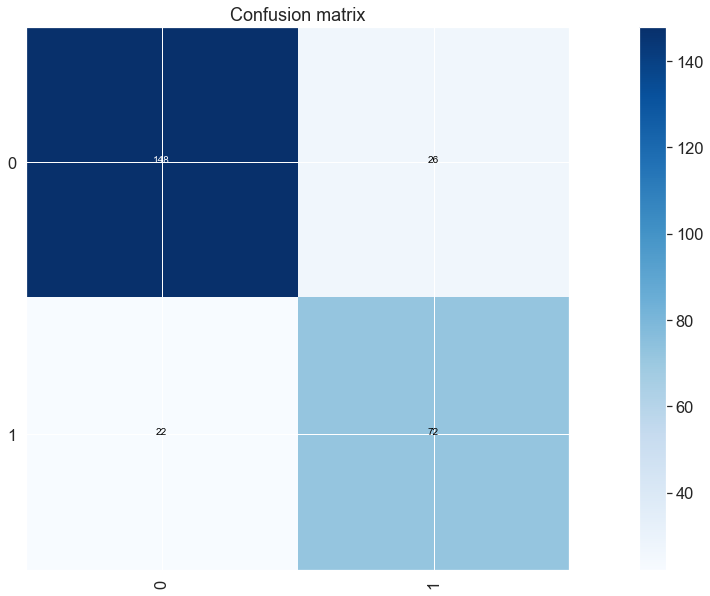

In [77]:
param = { 
         'C' : [25, 50, 75], # 1 is default
         'gamma' : [0.001, 0.01, 0.05], # 'auto' is default
         'kernel' : ['rbf', 'sigmoid'] # 'rbf' is default
         }

best_param_SVC = tune_plot(SVC, param,
                          df.drop(['Survived'], axis=1), df.Survived, normalize=True,
                          iter_gridsearch=10, nb_cv=5, test_size=0.3, seed=141421)

# RandomForestClassifier

 *************************  <class 'sklearn.ensemble.forest.RandomForestClassifier'>  ************************* 


best parameters:  {'n_estimators': 40, 'max_depth': 10}
Average cross validation: 0.8058922535638331
Accuracy is:  0.8059701492537313


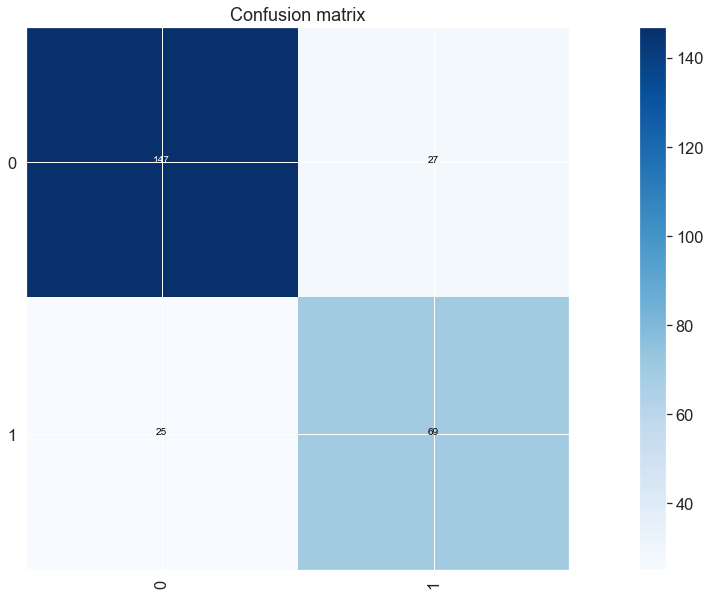

In [78]:
param = {
        'n_estimators': [20, 30, 40], # 10 is default
        'max_depth' : [5, 10, 15] # 'None' is default
        }

best_param_RFC = tune_plot(RandomForestClassifier, param,
                          df.drop(['Survived'], axis=1), df.Survived, normalize=True,
                          iter_gridsearch=10, nb_cv=5, test_size=0.3, seed=141421)

# XGBClassifier 

 *************************  <class 'xgboost.sklearn.XGBClassifier'>  ************************* 


best parameters:  {'min_child_weight': 20, 'gamma': 0.25, 'colsample_bytree': 0.6, 'max_depth': 10, 'n_estimators': 60}
Average cross validation: 0.8215470530220902
Accuracy is:  0.7873134328358209


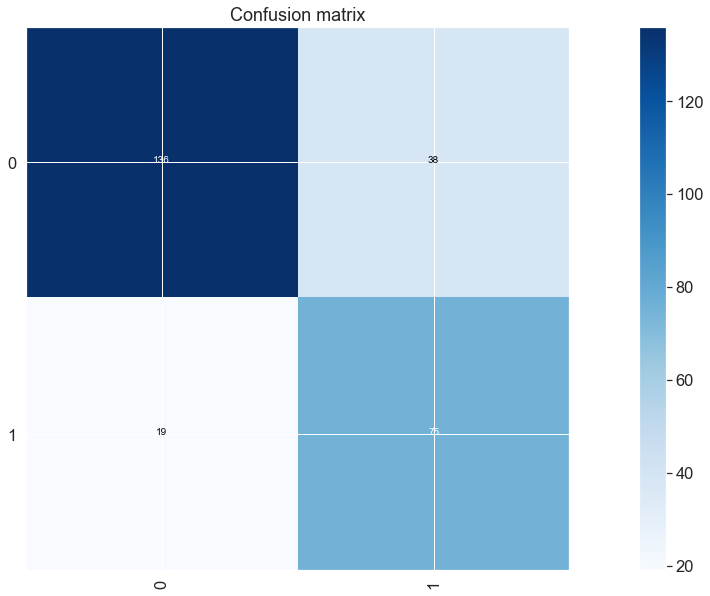

In [75]:
param = {'min_child_weight': [10, 20],
         'gamma': [0.25, 0.5],
         'colsample_bytree': [0.4, 0.6],
         'max_depth': [10, 20],
         'n_estimators': [40, 60]} 

best_param_XGB = tune_plot(XGBClassifier, param,
                          df.drop(['Survived'], axis=1), df.Survived, normalize=True,
                          iter_gridsearch=10, nb_cv=5, test_size=0.3, seed=141421)

# MLPClassifier

 *************************  <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>  ************************* 


best parameters:  {'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0001}
Average cross validation: 0.8092756651477575
Accuracy is:  0.7985074626865671


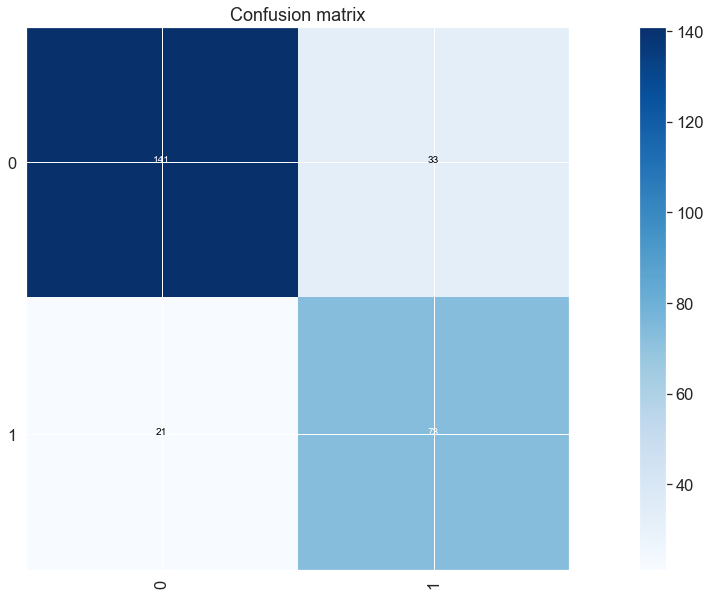

In [76]:
param = { 
    'hidden_layer_sizes' : [(100,)], # (100,) is default
    'activation' : ['logistic', 'relu', 'tanh'], # 'relu' is default
    'solver' : ['lbfgs', 'adam'], # 'adam' is default
    'alpha' : [0.0001] # 0.0001 is default
    }

best_param_MLP = tune_plot(MLPClassifier, param,
                          df.drop(['Survived'], axis=1), df.Survived, normalize=True,
                          iter_gridsearch=10, nb_cv=5, test_size=0.3, seed=141421)

# Voting method

Just for the pleasure..

Average cross validation (hard voting): 0.8218580645161291
Accuracy is (hard voting):  0.832089552238806


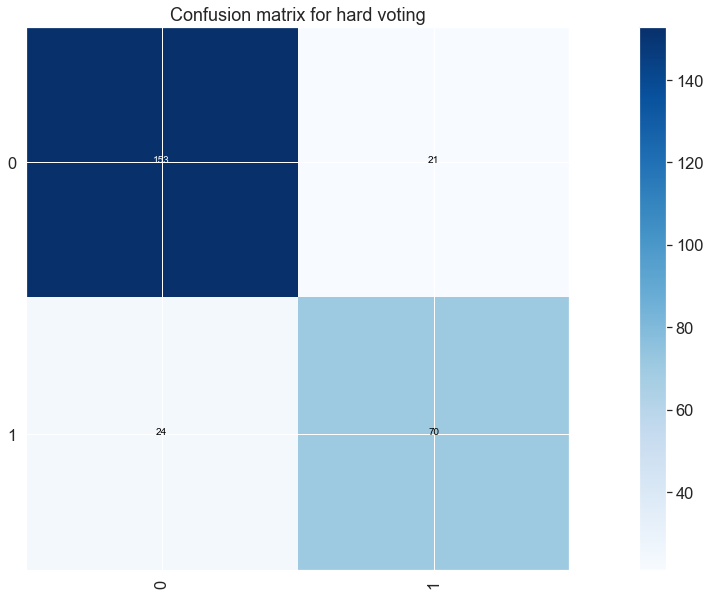

In [88]:
########################
### import libraries ###
########################

from sklearn.ensemble import  VotingClassifier

###########################
### Classifier reminder ###
###########################

seed=141421

classifier_xgb = XGBClassifier(**best_param_XGB, random_state=seed)

classifier_random_forest = RandomForestClassifier(**best_param_RFC, random_state=seed)

classifier_support_vector_classification = SVC(**best_param_SVC, random_state=seed)

classifier_mlp = MLPClassifier(**best_param_MLP, random_state=seed)

#####################
### split dataset ###
#####################

scaler = StandardScaler()
scaler.fit(df.drop(['Survived'], axis=1))
x_train, x_test, y_train, y_test = train_test_split(scaler.transform(df.drop(['Survived'], axis=1)),
                                                    df.Survived, test_size=0.3, random_state=seed)
##################################
### hard voting classifier fit ###
##################################

voting_classifier = VotingClassifier(estimators=[('random_forest', classifier_random_forest),
                                                 ('xgb', classifier_xgb),
                                                 ('support_vector', classifier_support_vector_classification),
                                                 ('multi-layer_perceptron', classifier_mlp)],
                                     voting='hard', weights=[1, 1, 1, 1])

voting_classifier = voting_classifier.fit(x_train, y_train)

###############################
### 3-Fold Cross validation ###
###############################

print('Average cross validation (hard voting): ' + str(np.mean(cross_val_score(voting_classifier, x_train, y_train, cv=5))))
ac = accuracy_score(y_test, voting_classifier.predict(x_test))
print('Accuracy is (hard voting): ', ac)

#####################################
### plotting the confusion matrix ###
#####################################

title='Confusion matrix for hard voting'
plt.figure(figsize=(25,10))
cm = confusion_matrix(y_test, voting_classifier.predict(x_test))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
classes = df.Survived.unique()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [92]:
voting_classifier = VotingClassifier(estimators=[('xgb', classifier_xgb),
                                                 ('support_vector', classifier_support_vector_classification)],
                                     voting='hard', weights=[1, 1])

voting_classifier = voting_classifier.fit(scaler.transform(df.drop(['Survived'], axis=1)), df.Survived)

voting_classifier.fit(df.drop('Survived', axis=1), df.Survived)
y_pred = voting_classifier.predict(test)
Kaggle = pd.DataFrame(data=test.PassengerId.values, columns=['PassengerId'])
Kaggle['Survived'] = y_pred
Kaggle.to_csv('predicted_2.csv', index=False)